# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

#PHASE 1

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## load dataset here
df = pd.read_csv("/content/drive/My Drive/ML/Data/final_project/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
## parsing data here
images, labels = parse_data(df)


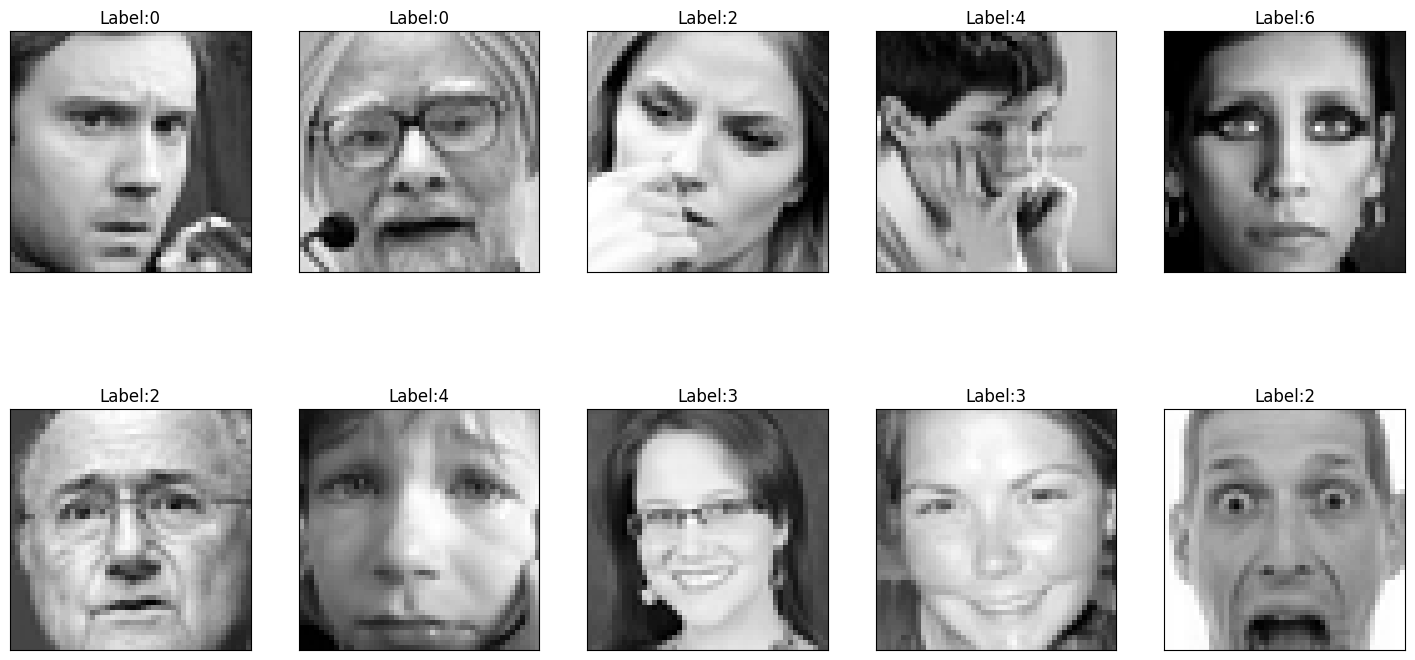

In [ ]:
## showing images here
show_img(images, labels)

### Data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [ ]:
len(df.pixels[0])

8287

In [ ]:
print(type(df.pixels[0]))

<class 'str'>


### Preprocessing

In [ ]:
# Split the string into a list of numbers
df_split = df['pixels'].str.split(' ', expand=True)

# Assign column names
df_split.columns = [f'{i+1}' for i in range(df_split.shape[1])]


df_split.head()

,1,2,3,4,5,6,7,8,9,10,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
# Check how many rows contain missing values
df_split.isnull().any(axis=1).sum()

0

In [ ]:
df_split.shape

(35887, 2304)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(df_split)
pca2_df = pd.DataFrame(pca2.transform(df_split))

In [ ]:
pca2_df.head()

,pca1,pca2
0,691.750859,-442.328646
1,-62.025489,561.762208
2,-1322.538070,-415.729682
3,-232.277887,656.803931
4,1796.585834,-2005.093947


In [ ]:
pca2_df.shape

(35887, 2)

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your data matrix
pca = PCA()
pca.fit(df_split)

# Explained variance
explained_variance = pca.explained_variance_

# Total variance
total_variance = np.sum(explained_variance)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Cumulative explained variance ratio
cumulative_explained_variance_ratio = cumulative_explained_variance / total_variance



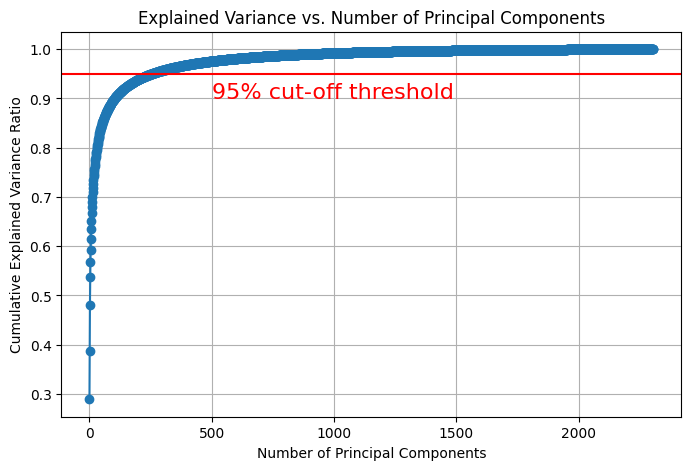

In [ ]:
# Plotting cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio)+1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Principal Components')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(500, 0.9, '95% cut-off threshold', color = 'red', fontsize=16)

plt.grid(True)
plt.show()

In [ ]:
# Choosing a threshold, e.g., 95%
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1

print(f'Number of components explaining {threshold*100}% of the variance: {num_components}')

Number of components explaining 95.0% of the variance: 255


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=255)
pca.fit(df_split)
pca_df = pd.DataFrame(pca.transform(df_split))

In [ ]:
pca_df.shape

(35887, 255)

In [ ]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,691.750859,-442.328649,-864.125553,389.987453,-511.411672,127.585443,106.166386,-52.826668,85.209730,152.914880,...,39.660114,-46.569844,-9.329600,3.306582,37.189829,10.082848,45.615922,13.497784,21.366321,2.285192
1,-62.025489,561.762207,565.149735,455.007830,-686.491870,91.659218,485.512104,142.392073,-86.236961,192.286571,...,18.097033,5.729552,-25.004634,34.911992,-36.159417,94.887175,-30.318075,-54.522917,39.056561,-72.383080
2,-1322.538070,-415.729686,-1930.813479,-268.862098,-810.788511,-951.422629,-1100.750593,285.101932,-318.091258,-58.438839,...,-59.024450,50.709047,19.499527,69.266704,-34.535950,-35.528450,-41.340013,1.704385,16.077751,-28.818817
3,-232.277887,656.803932,1417.060237,-1411.819979,736.970356,-27.561186,-971.055416,-661.773377,-275.999086,-251.127226,...,-33.078061,-34.445405,22.118988,26.229768,22.039052,-56.327991,-93.594622,-7.585183,2.143697,8.214590
4,1796.585834,-2005.093949,305.005651,-17.154925,-349.092367,-693.297635,-50.472897,28.735146,354.100711,570.006557,...,39.179110,-7.015820,-25.729911,55.612726,24.246120,15.032191,37.778038,91.823380,-27.201253,39.093667


### Step-by-Step Process

1. **Fit the PCA Model**:
   - Perform PCA on your dataset to transform the data into a set of principal components.

2. **Extract the Explained Variance**:
   - Once the PCA model is fitted, obtain the variance explained by each principal component. This is provided by the `pca.explained_variance_` attribute, which lists the variances in descending order for each principal component.

3. **Calculate Total Variance**:
   - Determine the total variance in the dataset. This is done by summing up all the explained variances from the principal components.

4. **Cumulative Explained Variance**:
   - Compute the cumulative sum of the explained variances. This cumulative sum indicates the total variance explained as more principal components are added.

5. **Cumulative Explained Variance Ratio**:
   - Normalize the cumulative explained variance by dividing each cumulative sum by the total variance. This provides the cumulative explained variance ratio, showing the proportion of the total variance explained by the first \( k \) components.

6. **Plotting (Optional)**:
   - Optionally, plot the cumulative explained variance ratio against the number of principal components. This plot typically shows an "elbow" where the explained variance begins to level off. This visualization aids in selecting the optimal number of components.

7. **Choose a Threshold**:
   - Decide on a threshold for the cumulative explained variance ratio. Common thresholds are 90% or 95%, meaning you aim to explain at least 90% or 95% of the total variance in the dataset.

8. **Determine the Number of Components**:
   - Identify the smallest number of principal components required to reach or exceed the chosen threshold. This is done by finding the point where the cumulative explained variance ratio first exceeds the threshold.

### Explanation of the Selection Process

The goal of this process is to find the minimum number of principal components that capture a significant portion of the total variance in the data, balancing between model simplicity and the amount of explained variance. Here’s a more detailed explanation of why each step is important:

- **Explained Variance**: Indicates how much variance each principal component captures. Components with higher explained variance capture more information from the data.
  
- **Total Variance**: Provides a reference for the total amount of variance present in the dataset, which is essential for understanding the relative contributions of each component.
  
- **Cumulative Explained Variance**: By summing the explained variances, you can see the total variance explained as you include more components, which helps in understanding the additive effect of including more components.
  
- **Cumulative Explained Variance Ratio**: Normalizing the cumulative explained variance makes it easier to decide on a threshold for the proportion of total variance you want to capture, facilitating a more straightforward decision-making process.
  
- **Plotting**: The plot helps visualize where adding more components results in diminishing returns. The "elbow" point in the plot often indicates the optimal number of components, as it shows where the rate of increase in explained variance slows down significantly.
  
- **Threshold Selection**: A threshold such as 90% or 95% ensures that you capture a substantial amount of the total variance while maintaining model simplicity by using fewer components.
  
- **Determine Number of Components**: Finding the point where the cumulative explained variance ratio meets or exceeds the threshold ensures you are selecting the minimum number of components needed to capture the desired amount of variance.

This structured approach ensures that you select a sufficient number of principal components to capture the bulk of the data's variance without overcomplicating the model with unnecessary components.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [ ]:
# splitting original data into train/val/test subsets
X_od = df_split
y_od = df.emotion

X_od_train, X_od_test, y_od_train, y_od_test = train_test_split(X_od, y_od, random_state=10, train_size=0.8)

In [ ]:
X_od_train.head()

,1,2,3,4,5,6,7,8,9,10,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
15835,255,255,255,255,255,255,255,255,255,252,...,255,253,255,255,255,255,255,255,255,255
26921,220,102,75,79,96,93,74,64,82,78,...,71,34,25,33,40,45,72,67,25,26
22879,20,42,45,26,32,35,44,56,58,43,...,227,228,229,225,221,232,240,226,227,229
31275,43,41,38,35,35,33,32,26,24,23,...,54,92,68,28,11,17,14,16,16,14
14633,81,100,117,145,176,192,200,205,206,208,...,188,223,222,226,227,227,227,228,228,229


In [ ]:
len(X_od_train), len(X_od_test)

(28709, 7178)

In [ ]:
# splitting transformed data into train/val/test subsets
X_td = pca_df
y_td = df.emotion

X_td_train, X_td_test, y_td_train, y_td_test = train_test_split(X_td, y_td, random_state=10, train_size=0.8)

In [ ]:
X_td_train.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
15835,2658.136259,2150.203747,1380.868284,307.260080,-33.141662,156.117408,111.289627,1117.816216,-1293.372396,90.076245,...,-92.360734,-24.672180,25.069450,94.043200,-88.392196,11.784562,30.733205,13.067839,-16.184883,-101.316455
26921,-11.825223,-1250.735718,-1058.540357,-832.216502,1083.069618,-184.250204,-170.092284,-0.461793,73.646686,-59.986175,...,-39.043563,22.427574,-15.883448,-47.792151,12.238655,-56.124268,-15.814477,-51.834696,-22.175436,52.619157
22879,-846.270746,18.781138,801.678349,-1209.616829,-792.543925,439.675327,-645.440435,173.823378,223.080042,-26.148888,...,12.482969,-34.650277,22.196053,12.298210,25.463955,-13.031019,-111.586422,-46.341032,32.026318,28.605073
31275,2913.808988,-668.576388,862.728766,-251.654416,554.185738,-782.056801,-30.221783,398.008153,133.808774,-354.528881,...,18.069097,-44.154899,47.786998,-25.557116,-18.396928,-58.899980,-73.192200,-29.144224,-100.103045,46.039837
14633,-3510.517591,-204.558848,74.733416,232.986473,102.086141,350.416210,-43.506973,225.355119,-274.877719,-148.071538,...,62.539699,48.263744,16.356672,-38.066908,-24.207111,4.791399,11.933205,-30.232998,23.067968,-10.967041


In [ ]:
len(X_td_train), len(X_td_test)

(28709, 7178)

## 3.1 SVM
A classifier that finds the hyperplane which best separates the classes in the feature space. It can work well in high-dimensional spaces and is effective in cases where the number of dimensions is greater than the number of samples

* ***Original data:***

In [ ]:
pipe_line_svm_od = make_pipeline(StandardScaler(), SVC())
pipe_line_svm_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
#Tuning model
param_grid = {"C": [0.01, 0.1, 1, 10],
              "gamma": ["scale", "auto"]}
gridsearch_svm_od = make_pipeline(StandardScaler(), GridSearchCV(SVC(), param_grid, cv=3, scoring="f1_micro", verbose=1, n_jobs=-1)) #chọn số cv là 10 và score để đánh giá là f1

gridsearch_svm_od.fit(X_od_train, y_od_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=SVC(),
                              param_grid={'C': [0.01, 0.1, 1, 10],
                                          'gamma': ['scale', 'auto']},
                              scoring='f1_micro', verbose=1))])

In [ ]:
#printing the param is considered best
gridsearch_svm_od[1].best_params_

{'C': 10, 'gamma': 'auto'}

In [ ]:
#Train the model again with the best param
pipe_line_svm_od = make_pipeline(StandardScaler(), SVC(C=10, gamma="auto"))
pipe_line_svm_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

* ***Transformed data:***

In [ ]:
pipe_line_svm_td = make_pipeline(StandardScaler(), SVC())
pipe_line_svm_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
#Tuning model
param_grid = {"C": [0.01, 0.1, 1, 10, 100],
              "gamma": ["scale", "auto"]}
gridsearch_svm_td = make_pipeline(StandardScaler(), GridSearchCV(SVC(), param_grid, cv=5, scoring="f1_micro", verbose=1)) #chọn số cv là 10 và score để đánh giá là f1

gridsearch_svm_td.fit(X_td_train, y_td_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.01, 0.1, 1, 10, 100],
                                          'gamma': ['scale', 'auto']},
                              scoring='f1_micro', verbose=1))])

In [ ]:
#printing the param is considered best
gridsearch_svm_td[1].best_params_

{'C': 10, 'gamma': 'auto'}

In [ ]:
#Train the model again with the best param
pipe_line_svm_td = make_pipeline(StandardScaler(), SVC(C=10, gamma="auto"))
pipe_line_svm_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

# 3.2 MLP models
A type of feedforward artificial neural network that consists of at least three layers of nodes: an input layer, a hidden layer, and an output layer. It uses backpropagation for training the network.

* ***Original data:***

In [ ]:
pipe_line_mlp_od = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, ), activation="relu", learning_rate="adaptive", batch_size=128, max_iter=200, early_stopping=True))
pipe_line_mlp_od.fit(X_od_train, y_od_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(batch_size=128, learning_rate='adaptive'))])

In [ ]:
#Tuning model
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [64, 128, 256]
}
gridsearch_mlp_od = make_pipeline(StandardScaler(), GridSearchCV(MLPClassifier(max_iter=200, early_stopping=True), param_grid, cv=5, n_jobs=-1, verbose=2 ))

gridsearch_mlp_od.fit(X_od_train, y_od_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=MLPClassifier(early_stopping=True),
                              n_jobs=-1,
                              param_grid={'activation': ['relu', 'tanh'],
                                          'batch_size': [64, 128, 256],
                                          'hidden_layer_sizes': [(50,), (100,),
                                                                 (50, 50),
                                                                 (100, 50)],
                                          'learning_rate': ['constant',
                                                            'adaptive']},
                              verbose=2))])

In [ ]:
#printing the param is considered best
gridsearch_mlp_od[1].best_params_

{'activation': 'relu',
 'batch_size': 256,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive'}

In [ ]:
#Train the model again with the best param
pipe_line_mlp_od = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, ), activation="relu", learning_rate="adaptive", batch_size=256, max_iter=200, early_stopping=True))
pipe_line_mlp_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(batch_size=256, early_stopping=True,
                               learning_rate='adaptive'))])

* ***Transformed data:***

In [ ]:
pipe_line_mlp_td = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, ), activation="relu", learning_rate="adaptive", batch_size=128, max_iter=200, early_stopping=True))
pipe_line_mlp_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(batch_size=128, early_stopping=True,
                               learning_rate='adaptive'))])

In [ ]:
#Tuning model
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [64, 128, 256]
}
gridsearch_mlp_td = make_pipeline(StandardScaler(), GridSearchCV(MLPClassifier(max_iter=200, early_stopping=True), param_grid, cv=5, n_jobs=-1 ))

gridsearch_mlp_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=MLPClassifier(early_stopping=True),
                              n_jobs=-1,
                              param_grid={'activation': ['relu', 'tanh'],
                                          'batch_size': [64, 128, 256],
                                          'hidden_layer_sizes': [(50,), (100,),
                                                                 (50, 50),
                                                                 (100, 50)],
                                          'learning_rate': ['constant',
                                                            'adaptive']}))])

In [ ]:
#printing the param is considered best
gridsearch_mlp_td[1].best_params_

{'activation': 'relu',
 'batch_size': 64,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant'}

In [ ]:
#Train the model again with the best param
pipe_line_mlp_td = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, ), activation="relu", learning_rate="constant", batch_size=64, max_iter=200, early_stopping=True))
pipe_line_mlp_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(batch_size=64, early_stopping=True))])

# 3.3 Random Forest
An ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes of the individual trees.

* ***Original data:***

In [ ]:
pipe_line_rf_od = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
pipe_line_rf_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
#Tuning model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 16]
}
gridsearch_rf_od = make_pipeline(StandardScaler(), GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1 ))

gridsearch_rf_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [4, 8, 16],
                                          'n_estimators': [50, 100, 200]}))])

In [ ]:
#printing the param is considered best
gridsearch_rf_od[1].best_params_

{'max_depth': 16, 'n_estimators': 200}

In [ ]:
#Train the model again with the best param
pipe_line_rf_od = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200, random_state=42, max_depth=16))
pipe_line_rf_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=16, n_estimators=200,
                                        random_state=42))])

* ***Transformed data:***

In [ ]:
pipe_line_rf_td = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
pipe_line_rf_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
pipe_line_rf_td.predict(X_td_test)

array([5, 6, 3, ..., 3, 3, 5])

In [ ]:
#Tuning model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 16]
}
gridsearch_rf_td = make_pipeline(StandardScaler(), GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1 ))

gridsearch_rf_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [4, 8, 16],
                                          'n_estimators': [50, 100, 200]}))])

In [ ]:
#printing the param is considered best
gridsearch_rf_td[1].best_params_

{'max_depth': 16, 'n_estimators': 200}

In [ ]:
#Train the model again with the best param
pipe_line_rf_td = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200, random_state=42, max_depth=16))
pipe_line_rf_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=16, n_estimators=200,
                                        random_state=42))])

# 3.4 k-Nearest Neighbors (k-NN)
A non-parametric algorithm that classifies a sample based on the majority class among its k nearest neighbors in the feature space. It can be used for both classification and regression tasks.

* ***Original data:***

In [ ]:
pipe_line_knn_od = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
pipe_line_knn_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
#Tuning model
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gridsearch_knn_od = make_pipeline(StandardScaler(), GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2 ))

gridsearch_knn_od.fit(X_od_train, y_od_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'metric': ['euclidean', 'manhattan',
                                                     'minkowski'],
                                          'n_neighbors': [3, 5, 7, 9],
                                          'weights': ['uniform', 'distance']},
                              verbose=2))])

In [ ]:
#printing the param is considered best
gridsearch_knn_od[1].best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
#Train the model again with the best param
pipe_line_knn_od = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3, metric="manhattan", weights="distance"))
pipe_line_knn_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

* ***Transformed data:***

In [ ]:
pipe_line_knn_td = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
pipe_line_knn_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
#Tuning model
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gridsearch_knn_td = make_pipeline(StandardScaler(), GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2 ))

gridsearch_knn_td.fit(X_td_train, y_td_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'metric': ['euclidean', 'manhattan',
                                                     'minkowski'],
                                          'n_neighbors': [3, 5, 7, 9],
                                          'weights': ['uniform', 'distance']},
                              verbose=2))])

In [ ]:
#printing the param is considered bestd
gridsearch_knn_td[1].best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
#Train the model again with the best param
pipe_line_knn_td = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3, metric="manhattan", weights="distance"))
pipe_line_knn_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



- I will compare the models trained with original data and then compare the models trained with transformed data. Only then can we draw conclusions about which model performs best.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define emotion categories
emotion_categories = ['0', '1', '2', '3', '4', '5', '6']

#Define function to visualize the confusion matrices
def plot_confusion_matrix(cm, emotion_categories):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_categories, yticklabels=emotion_categories)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

# Define function to Identify the emotion category where the model makes the most accurate and most errors (Base on f1 score)
def print_max_min_f1_scores(report):
    # Extract F1 scores from the report
    f1_scores = {label: metrics['f1-score'] for label, metrics in report.items() if isinstance(metrics, dict)}

    # Find the class with the maximum F1 score
    max_f1_class = max(f1_scores, key=f1_scores.get)
    max_f1_score = f1_scores[max_f1_class]

    # Find the class with the minimum F1 score
    min_f1_class = min(f1_scores, key=f1_scores.get)
    min_f1_score = f1_scores[min_f1_class]

    # Print the results
    print(f'Emotion with most accurate: {max_f1_class}, F1 score: {max_f1_score}')
    print(f'Emotion with most errors: {min_f1_class}, F1 score: {min_f1_score}')



# Original data:

In [ ]:
results_od = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

* **SVM**

In [ ]:
cm_svm_od = confusion_matrix(y_od_test, pipe_line_svm_od.predict(X_od_test))

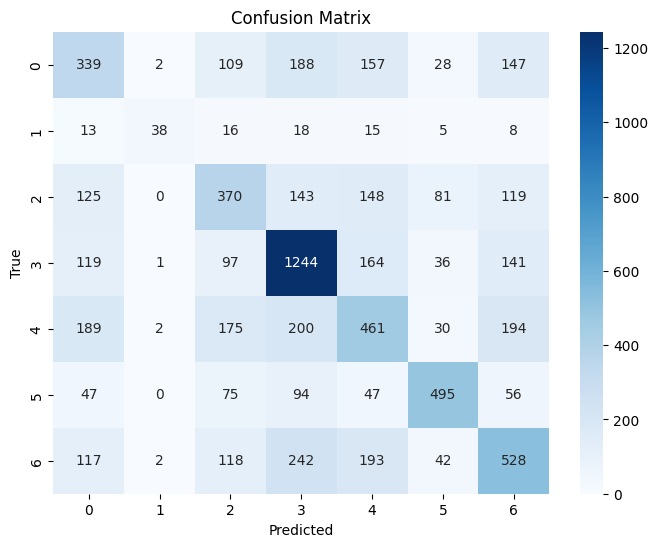

In [ ]:
plot_confusion_matrix(cm_svm_od, emotion_categories)

In [ ]:
print(classification_report(y_od_test, pipe_line_svm_od.predict(X_od_test)))

              precision    recall  f1-score   support

           0       0.36      0.35      0.35       970
           1       0.84      0.34      0.48       113
           2       0.39      0.38      0.38       986
           3       0.58      0.69      0.63      1802
           4       0.39      0.37      0.38      1251
           5       0.69      0.61      0.65       814
           6       0.44      0.43      0.43      1242

    accuracy                           0.48      7178
   macro avg       0.53      0.45      0.47      7178
weighted avg       0.48      0.48      0.48      7178



In [ ]:
cr_svm_od = classification_report(y_od_test, pipe_line_svm_od.predict(X_od_test), output_dict=True)

In [ ]:
results_od["Model"].append("SVM")
results_od["Accuracy"].append(cr_svm_od['accuracy'])
results_od["Precision"].append(cr_svm_od['macro avg']['precision'])
results_od["Recall"].append(cr_svm_od['macro avg']['recall'])
results_od["F1-Score"].append(cr_svm_od['macro avg']['f1-score'])


In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_svm_od)

Emotion with most accurate: 5, F1 score: 0.6466361854996734
Emotion with most errors: 0, F1 score: 0.35330901511203755


* **MLP model**

In [ ]:
cm_mlp_od = confusion_matrix(y_od_test, pipe_line_mlp_od.predict(X_od_test))

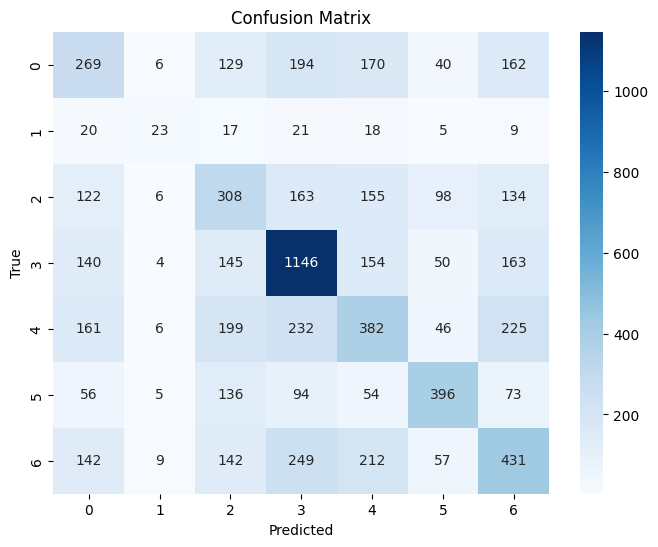

In [ ]:
plot_confusion_matrix(cm_mlp_od, emotion_categories)

In [ ]:
print(classification_report(y_od_test, pipe_line_mlp_od.predict(X_od_test)))

              precision    recall  f1-score   support

           0       0.30      0.22      0.25       970
           1       0.39      0.24      0.30       113
           2       0.31      0.31      0.31       986
           3       0.54      0.64      0.58      1802
           4       0.32      0.34      0.33      1251
           5       0.56      0.55      0.56       814
           6       0.36      0.33      0.34      1242

    accuracy                           0.41      7178
   macro avg       0.40      0.38      0.38      7178
weighted avg       0.41      0.41      0.41      7178



In [ ]:
cr_mlp_od = classification_report(y_od_test, pipe_line_mlp_od.predict(X_od_test), output_dict=True)

In [ ]:
results_od["Model"].append("MLP")
results_od["Accuracy"].append(cr_mlp_od['accuracy'])
results_od["Precision"].append(cr_mlp_od['macro avg']['precision'])
results_od["Recall"].append(cr_mlp_od['macro avg']['recall'])
results_od["F1-Score"].append(cr_mlp_od['macro avg']['f1-score'])


In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_mlp_od)

Emotion with most accurate: 3, F1 score: 0.5875416559856448
Emotion with most errors: 1, F1 score: 0.26744186046511625


* **Random Forest Classifier**

In [ ]:
cm_rf_od = confusion_matrix(y_od_test, pipe_line_rf_od.predict(X_od_test))

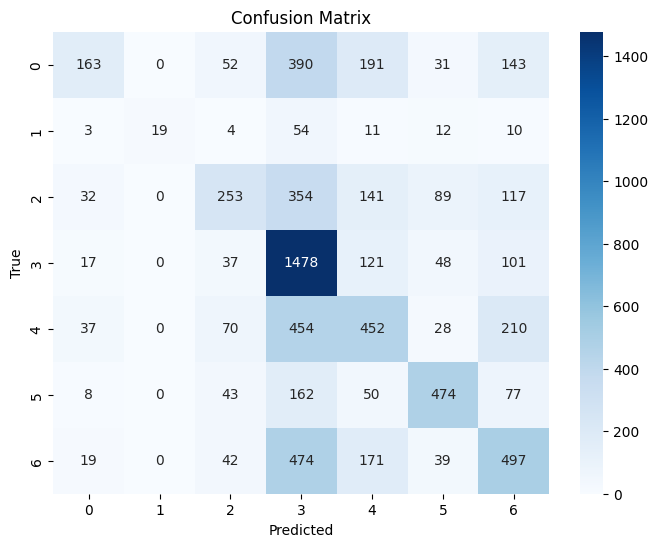

In [ ]:
plot_confusion_matrix(cm_rf_od, emotion_categories)

In [ ]:
print(classification_report(y_od_test, pipe_line_rf_od.predict(X_od_test)))

              precision    recall  f1-score   support

           0       0.58      0.17      0.26       970
           1       1.00      0.17      0.29       113
           2       0.50      0.26      0.34       986
           3       0.44      0.82      0.57      1802
           4       0.40      0.36      0.38      1251
           5       0.66      0.58      0.62       814
           6       0.43      0.40      0.41      1242

    accuracy                           0.46      7178
   macro avg       0.57      0.39      0.41      7178
weighted avg       0.49      0.46      0.44      7178



In [ ]:
cr_rf_od = classification_report(y_od_test, pipe_line_rf_od.predict(X_od_test), output_dict=True)

In [ ]:
results_od["Model"].append("RF")
results_od["Accuracy"].append(cr_rf_od['accuracy'])
results_od["Precision"].append(cr_rf_od['macro avg']['precision'])
results_od["Recall"].append(cr_rf_od['macro avg']['recall'])
results_od["F1-Score"].append(cr_rf_od['macro avg']['f1-score'])

In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_rf_od)

Emotion with most accurate: 5, F1 score: 0.6175895765472312
Emotion with most errors: 0, F1 score: 0.2610088070456365


* **k-Nearest Neighbors (k-NN)**

In [ ]:
cm_knn_od = confusion_matrix(y_od_test, pipe_line_knn_od.predict(X_od_test))

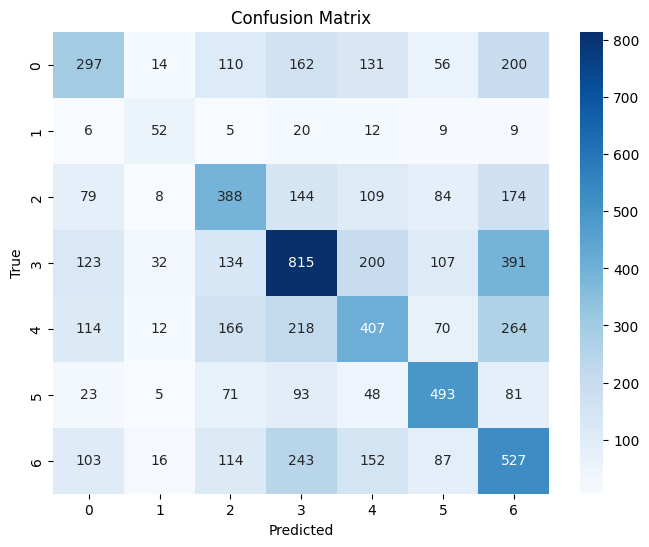

In [ ]:
plot_confusion_matrix(cm_knn_od, emotion_categories)

In [ ]:
print(classification_report(y_od_test, pipe_line_knn_od.predict(X_od_test)))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35       970
           1       0.37      0.46      0.41       113
           2       0.39      0.39      0.39       986
           3       0.48      0.45      0.47      1802
           4       0.38      0.33      0.35      1251
           5       0.54      0.61      0.57       814
           6       0.32      0.42      0.36      1242

    accuracy                           0.42      7178
   macro avg       0.41      0.42      0.42      7178
weighted avg       0.42      0.42      0.41      7178



In [ ]:
cr_knn_od = classification_report(y_od_test, pipe_line_knn_od.predict(X_od_test), output_dict=True)

In [ ]:
results_od["Model"].append('k-NN')
results_od["Accuracy"].append(cr_knn_od['accuracy'])
results_od["Precision"].append(cr_knn_od['macro avg']['precision'])
results_od["Recall"].append(cr_knn_od['macro avg']['recall'])
results_od["F1-Score"].append(cr_knn_od['macro avg']['f1-score'])


In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_knn_od)

Emotion with most accurate: 5, F1 score: 0.5732558139534883
Emotion with most errors: 0, F1 score: 0.34635568513119536


### Analysis:


In [ ]:
results_od_df = pd.DataFrame(results_od)

In [ ]:
print(results_od_df)

  Model  Accuracy  Precision    Recall  F1-Score
0   SVM  0.484118   0.527626  0.450443  0.472330
1   MLP  0.414739   0.396399  0.375192  0.381535
2    RF  0.464753   0.573368  0.393822  0.410284
3  k-NN  0.415018   0.413563  0.423922  0.415553


1. **Support Vector Machine (SVM)**:
   - SVM has the highest accuracy and a relatively balanced precision and recall, leading to a decent F1-Score.

2. **Multi-Layer Perceptron (MLP)**:
   - MLP has the lowest accuracy and F1-Score, indicating it may not be performing well compared to the other models.

3. **Random Forest (RF)**:
   - RF shows the highest precision but has a lower recall, resulting in a moderate F1-Score.

4. **k-Nearest Neighbors (k-NN)**:
   - k-NN has a balanced precision and recall, but its accuracy is on the lower end.

### Summary:
- **SVM** is the best performer in terms of accuracy and has a good balance of precision and recall, resulting in the highest F1-Score among the models.
- **RF** has the highest precision but suffers from lower recall.
- **k-NN** shows balanced precision and recall but with lower overall accuracy and F1-Score.
- **MLP** is the weakest performer in this comparison.

Given these insights, SVM appears to be the most promising model overall, though specific use cases might still benefit from the strengths of other models, such as RF's high precision.

# Transformed data:

In [ ]:
results_td = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

* **SVM**

In [ ]:
cm_svm_td = confusion_matrix(y_td_test, pipe_line_svm_td.predict(X_td_test))

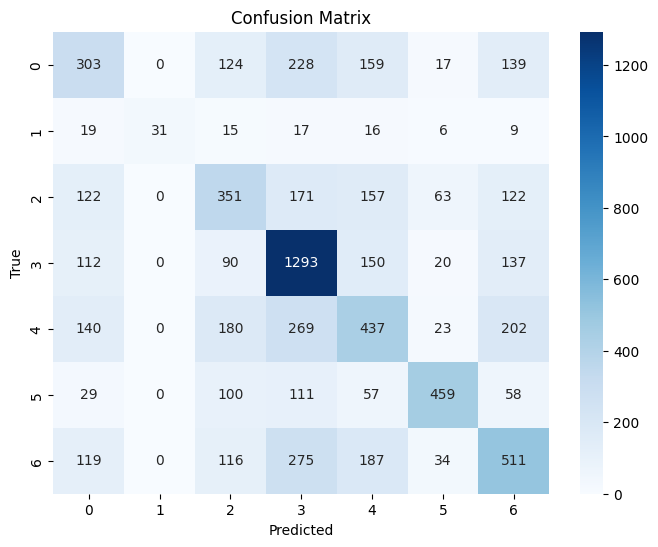

In [ ]:
plot_confusion_matrix(cm_svm_td, emotion_categories)

In [ ]:
print(classification_report(y_td_test, pipe_line_svm_td.predict(X_td_test)))

              precision    recall  f1-score   support

           0       0.35      0.31      0.33       970
           1       0.97      0.29      0.45       113
           2       0.37      0.35      0.36       986
           3       0.54      0.72      0.62      1802
           4       0.38      0.36      0.37      1251
           5       0.71      0.57      0.63       814
           6       0.44      0.41      0.43      1242

    accuracy                           0.47      7178
   macro avg       0.54      0.43      0.46      7178
weighted avg       0.47      0.47      0.47      7178



In [ ]:
cr_svm_td = classification_report(y_td_test, pipe_line_svm_td.predict(X_td_test), output_dict=True)

In [ ]:
results_td["Model"].append("SVM")
results_td["Accuracy"].append(cr_svm_td['accuracy'])
results_td["Precision"].append(cr_svm_td['macro avg']['precision'])
results_td["Recall"].append(cr_svm_td['macro avg']['recall'])
results_td["F1-Score"].append(cr_svm_td['macro avg']['f1-score'])


In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_svm_td)

Emotion with most accurate: 5, F1 score: 0.639275766016713
Emotion with most errors: 0, F1 score: 0.3340683572216097


* **MLP model**

In [ ]:
cm_mlp_td = confusion_matrix(y_td_test, pipe_line_mlp_td.predict(X_td_test))

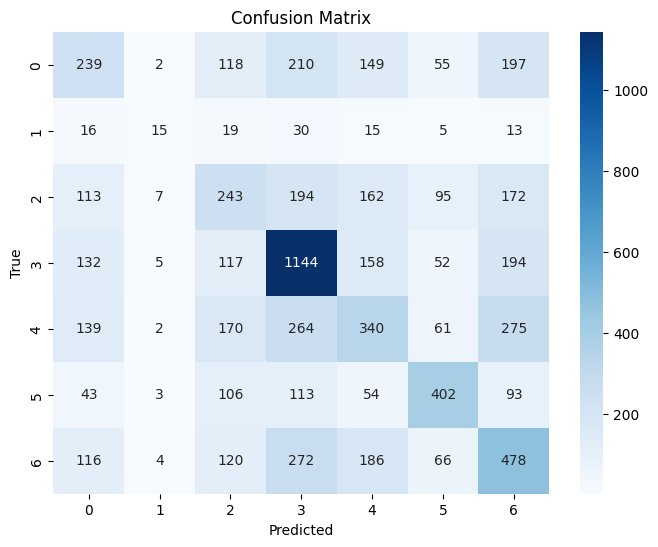

In [ ]:
plot_confusion_matrix(cm_mlp_td, emotion_categories)

In [ ]:
print(classification_report(y_td_test, pipe_line_mlp_td.predict(X_td_test)))

              precision    recall  f1-score   support

           0       0.29      0.25      0.27       970
           1       0.39      0.18      0.24       113
           2       0.29      0.25      0.26       986
           3       0.53      0.62      0.57      1802
           4       0.32      0.33      0.32      1251
           5       0.51      0.53      0.52       814
           6       0.35      0.34      0.35      1242

    accuracy                           0.40      7178
   macro avg       0.38      0.36      0.36      7178
weighted avg       0.39      0.40      0.40      7178



In [ ]:
cr_mlp_td = classification_report(y_td_test, pipe_line_mlp_td.predict(X_td_test), output_dict=True)

In [ ]:
results_td["Model"].append("MLP")
results_td["Accuracy"].append(cr_mlp_td['accuracy'])
results_td["Precision"].append(cr_mlp_td['macro avg']['precision'])
results_td["Recall"].append(cr_mlp_td['macro avg']['recall'])
results_td["F1-Score"].append(cr_mlp_td['macro avg']['f1-score'])

In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_mlp_td)

Emotion with most accurate: 3, F1 score: 0.5678828493422685
Emotion with most errors: 1, F1 score: 0.19867549668874174


* **Random Forest Classifier**

In [ ]:
cm_rf_td = confusion_matrix(y_td_test, pipe_line_rf_td.predict(X_td_test))

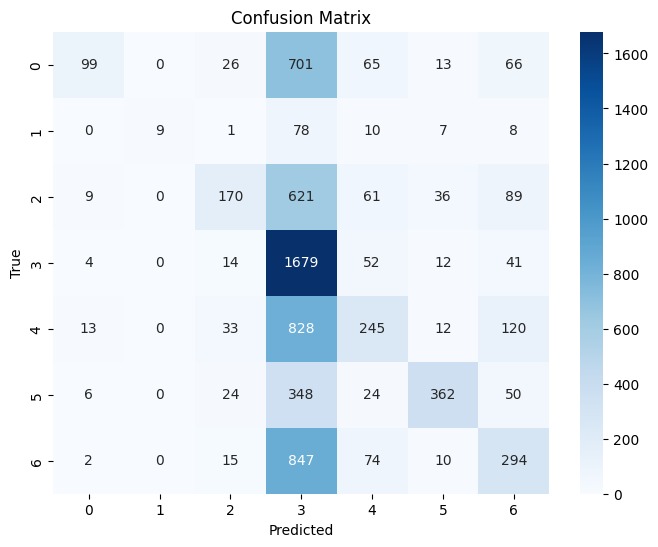

In [ ]:
plot_confusion_matrix(cm_rf_td, emotion_categories)

In [ ]:
print(classification_report(y_td_test, pipe_line_rf_td.predict(X_td_test)))

              precision    recall  f1-score   support

           0       0.72      0.10      0.18       970
           1       1.00      0.10      0.18       113
           2       0.59      0.17      0.27       986
           3       0.33      0.93      0.49      1802
           4       0.46      0.19      0.27      1251
           5       0.79      0.45      0.58       814
           6       0.44      0.25      0.32      1242

    accuracy                           0.40      7178
   macro avg       0.62      0.31      0.33      7178
weighted avg       0.52      0.40      0.35      7178



In [ ]:
cr_rf_td = classification_report(y_td_test, pipe_line_rf_td.predict(X_td_test), output_dict=True)

In [ ]:
results_td["Model"].append("RF")
results_td["Accuracy"].append(cr_rf_td['accuracy'])
results_td["Precision"].append(cr_rf_td['macro avg']['precision'])
results_td["Recall"].append(cr_rf_td['macro avg']['recall'])
results_td["F1-Score"].append(cr_rf_td['macro avg']['f1-score'])

In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_rf_td)

Emotion with most accurate: 5, F1 score: 0.5718799368088467
Emotion with most errors: 1, F1 score: 0.1475409836065574


* **k-Nearest Neighbors (k-NN)**

In [ ]:
cm_knn_td = confusion_matrix(y_td_test, pipe_line_knn_td.predict(X_td_test))

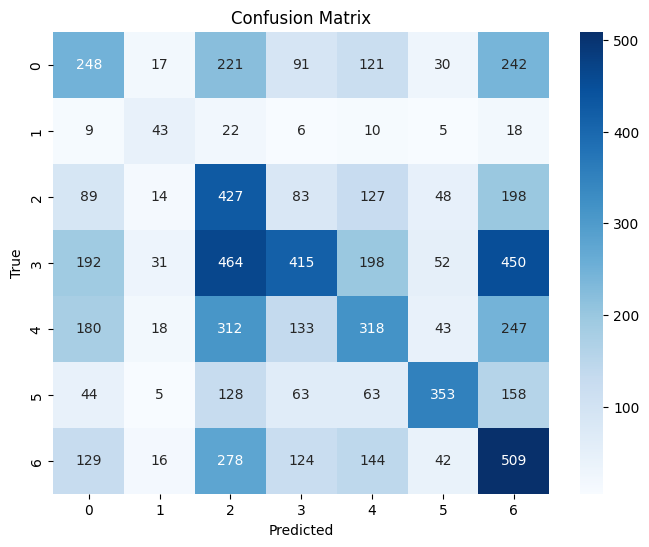

In [ ]:
plot_confusion_matrix(cm_knn_td, emotion_categories)

In [ ]:
print(classification_report(y_td_test, pipe_line_knn_td.predict(X_td_test)))

              precision    recall  f1-score   support

           0       0.28      0.25      0.27       970
           1       0.34      0.43      0.38       113
           2       0.23      0.44      0.30       986
           3       0.48      0.24      0.32      1802
           4       0.32      0.25      0.28      1251
           5       0.61      0.45      0.52       814
           6       0.28      0.40      0.33      1242

    accuracy                           0.33      7178
   macro avg       0.36      0.35      0.34      7178
weighted avg       0.37      0.33      0.33      7178



In [ ]:
cr_knn_td = classification_report(y_td_test, pipe_line_knn_td.predict(X_td_test), output_dict=True)

In [ ]:
results_td["Model"].append('k-NN')
results_td["Accuracy"].append(cr_knn_td['accuracy'])
results_td["Precision"].append(cr_knn_td['macro avg']['precision'])
results_td["Recall"].append(cr_knn_td['macro avg']['recall'])
results_td["F1-Score"].append(cr_knn_td['macro avg']['f1-score'])

In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_knn_td)

Emotion with most accurate: 5, F1 score: 0.5090122566690699
Emotion with most errors: 0, F1 score: 0.26652337452982267


### Analysis

In [ ]:
results_td_df = pd.DataFrame(results_td)

In [ ]:
print(results_td_df)

  Model  Accuracy  Precision    Recall  F1-Score
0   SVM  0.472834   0.539079  0.429740  0.455127
1   MLP  0.402340   0.382689  0.355732  0.362423
2    RF  0.401087   0.619176  0.314129  0.325624
3  k-NN  0.327250   0.362257  0.353665  0.343099


1. **Accuracy**:
   - The SVM model has the highest accuracy (0.4728), followed by MLP (0.4023), RF (0.4011), and k-NN (0.3273).
   
2. **Precision**:
   - RF has the highest precision (0.6192), indicating it makes fewer false positive errors compared to other models. SVM follows with a precision of 0.5391.

3. **Recall**:
   - SVM has the highest recall (0.4297), suggesting it captures more true positives compared to other models.

4. **F1-Score**:
   - SVM also has the highest F1-Score (0.4551), which balances both precision and recall, making it the most balanced model among the four.

### Summary
- **Best Overall Performance**: The SVM model appears to be the best performing overall due to its highest accuracy and F1-Score.
- **Highest Precision**: The RF model has the highest precision but lower recall and F1-Score, indicating it might be suitable for scenarios where minimizing false positives is crucial.
- **Balanced Performance**: MLP and k-NN have lower metrics across the board compared to SVM and RF, suggesting they might not be as suitable for this particular problem.

In conclusion, the SVM model is recommended for its balanced and relatively high performance across different metrics.

#Conclusion
**SVM is the best model** for both dataset due to it's the best performer in terms of accuracy and has a good balance of precision and recall, resulting in the highest F1-Score among the models

#PHASE 2

#5. Deep learning model

In [ ]:
from sklearn.model_selection import train_test_split

#5.1 Data Preparation

In [ ]:
labels = df['emotion'].values # Extract label column
pixels = df_split.values.astype(float)  # Extract pixel data

In [ ]:
# Reshape the pixel data
pixels = pixels.reshape(-1, 48, 48, 1)  # Reshape to (num_samples, 48, 48, 1)

# Normalize pixel values to the range [0, 1]
pixels = pixels / 255.0

In [ ]:
# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(pixels, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes for verification
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (25120, 48, 48, 1) (25120,)
Validation set shape: (5383, 48, 48, 1) (5383,)
Testing set shape: (5384, 48, 48, 1) (5384,)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Number of classes
num_classes = 7

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Check shapes after encoding
print("y_train shape after encoding:", y_train.shape)
print("y_val shape after encoding:", y_val.shape)
print("y_test shape after encoding:", y_test.shape)

y_train shape after encoding: (25120, 7)
y_val shape after encoding: (5383, 7)
y_test shape after encoding: (5384, 7)


#5.2 Model Architecture

#5.2.1 Basic CNN Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the CNN model
def create_model(input_shape=(48, 48, 1), num_classes=7):
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the model
input_shape = (48, 48, 1)  # Input shape (48x48 grayscale images)
num_classes = 7  # Number of emotion classes
basic_CNN_model = create_model(input_shape, num_classes)

# Compile the model
basic_CNN_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
basic_CNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 619,911 (2.36 MB)

 Trainable params: 619,463 (2.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train the model
batch_size = 64
epochs = 25

history = basic_CNN_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Evaluate on the test set
test_loss, test_accuracy = basic_CNN_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2501 - loss: 2.1933 - val_accuracy: 0.2735 - val_loss: 1.9762
Epoch 2/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3720 - loss: 1.6091 - val_accuracy: 0.4080 - val_loss: 1.5396
Epoch 3/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4046 - loss: 1.5274 - val_accuracy: 0.2671 - val_loss: 1.8391
Epoch 4/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4405 - loss: 1.4575 - val_accuracy: 0.4639 - val_loss: 1.3908
Epoch 5/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4618 - loss: 1.4083 - val_accuracy: 0.5036 - val_loss: 1.3125
Epoch 6/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4841 - loss: 1.3516 - val_accuracy: 0.4925 - val_loss: 1.3292
Epoch 7/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4934 - loss: 1.3178 - val_accuracy: 0.5164 - val_loss: 1.2766
Epoch 8/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5051 - loss: 1.2892 - val_accuracy: 

In [ ]:
# model_path = "/content/drive/My Drive/ML/Data/model/basic_CNN_model.keras"
# basic_CNN_model.save(model_path)

#5.2.2 ResNet

In [ ]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam

def residual_block(x, filters, kernel_size=3, stride=1):
    """Defines a residual block with a skip connection."""
    # Shortcut connection
    shortcut = x

    # First convolution layer
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)

    # Second convolution layer
    x = layers.Conv2D(filters, kernel_size, strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)

    # Adding the shortcut connection
    if stride != 1:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, padding="same")(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation("relu")(x)
    return x

def create_resnet(input_shape=(48, 48, 1), num_classes=7):
    """Builds a ResNet model."""
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = layers.Conv2D(64, (7, 7), strides=2, padding="same", activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding="same")(x)

    # Residual Blocks
    x = residual_block(x, 64, stride=1)  # Block 1
    x = residual_block(x, 128, stride=2)  # Block 2
    x = residual_block(x, 256, stride=2)  # Block 3
    x = residual_block(x, 512, stride=2)  # Block 4

    # Global Average Pooling and Output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    # Create model
    model = models.Model(inputs, outputs)
    return model

# Create and compile the model
input_shape = (48, 48, 1)
num_classes = 7
model = create_resnet(input_shape=input_shape, num_classes=num_classes)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 48, 48, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 24, 24, 64)     │          3,200 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 24, 24, 64)     │            256 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 12, 12, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 12, 12, 64)     │         36,928 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 12, 12, 64)     │            256 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 12, 12, 64)     │         36,928 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 12, 12, 64)     │            256 │ conv2d_14[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 12, 12, 64)     │              0 │ batch_normalization_1… │
│                           │                        │                │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activation) │ (None, 12, 12, 64)     │              0 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 6, 6, 128)      │         73,856 │ activation_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 6, 6, 128)      │            512 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 6, 6, 128)      │        147,584 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 6, 6, 128)      │          8,320 │ activation_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 6, 6, 128)      │            512 │ conv2d_16[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1

 Total params: 5,041,287 (19.23 MB)

 Trainable params: 5,035,527 (19.21 MB)

 Non-trainable params: 5,760 (22.50 KB)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    verbose=1
)


Epoch 1/25
 16/785 ━━━━━━━━━━━━━━━━━━━━ 2:07 165ms/step - accuracy: 0.2317 - loss: 1.8131

KeyboardInterrupt: 

In [ ]:
# If you have a separate test set, evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2455 - loss: 1.8197
Test Loss: 1.809954285621643
Test Accuracy: 0.24795691668987274


#5.2.3 DenseNet

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

def create_densenet_model(input_shape=(48, 48, 1), num_classes=7):
    # Load DenseNet121 architecture
    base_model = DenseNet121(
        include_top=False,        # Do not include the DenseNet top layer
        weights=None,             # No pre-trained weights
        input_shape=input_shape   # Specify input shape
    )

    # Add custom layers on top of the DenseNet base
    x = layers.GlobalAveragePooling2D()(base_model.output)  # Global Pooling
    x = layers.Dense(256, activation='relu')(x)            # Fully connected layer
    x = layers.Dropout(0.5)(x)                             # Dropout for regularization
    outputs = layers.Dense(num_classes, activation='softmax')(x)  # Output layer for classification

    # Create the final model
    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model

# Instantiate the model
model = create_densenet_model()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 54, 54, 1)      │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          3,136 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 24, 24, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 24, 24, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 26, 26, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 12, 12, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 12, 12, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 12, 12, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 7,295,431 (27.83 MB)

 Trainable params: 7,211,783 (27.51 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
# Train the model
batch_size = 64
epochs = 25

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 1007s 2s/step - accuracy: 0.2412 - loss: 1.8831 - val_accuracy: 0.1741 - val_loss: 1.9001
Epoch 2/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 899s 2s/step - accuracy: 0.3812 - loss: 1.5804 - val_accuracy: 0.2159 - val_loss: 1.8329
Epoch 3/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 925s 2s/step - accuracy: 0.4468 - loss: 1.4432 - val_accuracy: 0.2710 - val_loss: 3.3702
Epoch 4/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.4618 - loss: 1.4147 - val_accuracy: 0.3714 - val_loss: 1.5669
Epoch 5/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 933s 2s/step - accuracy: 0.4969 - loss: 1.3155 - val_accuracy: 0.3335 - val_loss: 1.6505
Epoch 6/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 962s 2s/step - accuracy: 0.5321 - loss: 1.2355 - val_accuracy: 0.3141 - val_loss: 1.6988
Epoch 7/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 945s 2s/step - accuracy: 0.5454 - loss: 1.1917 - val_accuracy: 0.4667 - val_loss: 1.3885
Epoch 8/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 910s 2s/step - accuracy: 0.5550 - loss: 1.1744 - val_acc

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

169/169 ━━━━━━━━━━━━━━━━━━━━ 43s 257ms/step - accuracy: 0.5657 - loss: 2.0735
Test Loss: 1.9957977533340454
Test Accuracy: 0.5694651007652283


#PHASE 3

#1. Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# import json
# import pandas as pd
# from PIL import Image, ImageDraw

# # Đường dẫn tới thư mục chứa JSON và ảnh
# json_folder = "/content/drive/My Drive/ML/Data/human parts/ann"
# image_folder = "/content/drive/My Drive/ML/Data/human parts/img"
# output_image_folder = "/content/drive/My Drive/ML/Data/human parts/bounding box"
# output_csv_path = "/content/drive/My Drive/ML/Data/human parts/bounding_box.csv"


# # Tạo danh sách tổng hợp các thông tin
# data_list = []

# # Duyệt qua tất cả file JSON trong thư mục
# for json_file in os.listdir(json_folder):
#     if json_file.endswith('.json'):
#         json_path = os.path.join(json_folder, json_file)

#         # Đọc file JSON
#         with open(json_path, 'r') as file:
#             data = json.load(file)

#         # Lấy tên ảnh tương ứng (giả sử ảnh có cùng tên với file JSON)
#         # Lấy tên ảnh tương ứng từ tên file JSON
#         image_name = os.path.splitext(json_file)[0]  # Loại bỏ phần .json
#         image_path = os.path.join(image_folder, image_name)


#         # Kiểm tra nếu ảnh tồn tại
#         if not os.path.exists(image_path):
#             print(f"Ảnh {image_name} không tồn tại. Bỏ qua file JSON này.")
#             continue

#         # Đọc thông tin objects từ JSON
#         objects = data['objects']
#         for obj in objects:
#             # Lưu thông tin object vào danh sách
#             data_list.append({
#                 'json_file': json_file,
#                 'image_name': image_name,
#                 'id': obj['id'],
#                 'classTitle': obj['classTitle'],
#                 'x_min': obj['points']['exterior'][0][0],
#                 'y_min': obj['points']['exterior'][0][1],
#                 'x_max': obj['points']['exterior'][1][0],
#                 'y_max': obj['points']['exterior'][1][1]
#             })

#         # Vẽ bounding boxes lên ảnh
#         img = Image.open(image_path)
#         draw = ImageDraw.Draw(img)
#         for obj in objects:
#             x_min, y_min = obj['points']['exterior'][0]
#             x_max, y_max = obj['points']['exterior'][1]
#             draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=2)

#         # # Lưu ảnh đã vẽ bounding boxes vào thư mục đầu ra
#         # os.makedirs(output_image_folder, exist_ok=True)
#         # output_image_path = os.path.join(output_image_folder, image_name)
#         # img.save(output_image_path)

# # # Chuyển đổi danh sách thành DataFrame và lưu thành CSV
# df = pd.DataFrame(data_list)
# # df.to_csv(output_csv_path, index=False)

# print(f"Đã lưu dữ liệu vào {output_csv_path}")
# print(f"Ảnh đã xử lý được lưu trong thư mục {output_image_folder}")



KeyboardInterrupt: 

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/ML/Data/human parts/bounding_box.csv')

In [ ]:




# Nhóm dữ liệu theo `image_name`
grouped_data = df.groupby("image_name")

# Tạo danh sách chứa thông tin cho từng ảnh
dataset = []
for image_name, group in grouped_data:
    image_path = f"/content/drive/My Drive/ML/Data/human parts/img/{image_name}"  # Đường dẫn tới ảnh
    boxes = group[["x_min", "y_min", "x_max", "y_max"]].values.tolist()
    labels = group["classTitle"].apply(
        lambda x: 1 if x == "person" else 2 if x == "face" else 3
    ).tolist()  # Mã hóa nhãn thành số
    dataset.append({"image_path": image_path, "boxes": boxes, "labels": labels})

print(f"Tổng số ảnh trong dataset: {len(dataset)}")


Tổng số ảnh trong dataset: 773


In [ ]:
grouped_data.head()

,json_file,image_name,id,classTitle,x_min,y_min,x_max,y_max
0,8a26e392b895c306153ed1b219743cf3ff3a2f79.jpeg....,8a26e392b895c306153ed1b219743cf3ff3a2f79.jpeg,149044010,person,37,50,416,754
1,8a26e392b895c306153ed1b219743cf3ff3a2f79.jpeg....,8a26e392b895c306153ed1b219743cf3ff3a2f79.jpeg,149044009,hand,233,378,273,427
2,8a26e392b895c306153ed1b219743cf3ff3a2f79.jpeg....,8a26e392b895c306153ed1b219743cf3ff3a2f79.jpeg,149044008,hand,315,362,362,419
3,8a26e392b895c306153ed1b219743cf3ff3a2f79.jpeg....,8a26e392b895c306153ed1b219743cf3ff3a2f79.jpeg,149044007,face,287,74,342,152
4,00f55793e90c150c4bf7643e351652985d8c22b9.jpeg....,00f55793e90c150c4bf7643e351652985d8c22b9.jpeg,148985295,person,166,67,425,805
...,...,...,...,...,...,...,...,...
5380,c05400e168730cf8cabeca6e6e2c610b4af18b81.jpeg....,c05400e168730cf8cabeca6e6e2c610b4af18b81.jpeg,149066163,hand,436,561,472,600
5381,cbdc04a02ac154a1d20b092d33af2d648328e52a.jpeg....,cbdc04a02ac154a1d20b092d33af2d648328e52a.jpeg,149070582,person,230,22,556,997
5382,cbdc04a02ac154a1d20b092d33af2d648328e52a.jpeg....,cbdc04a02ac154a1d20b092d33af2d648328e52a.jpeg,149070581,face,322,116,410,231
5383,cbdc04a02ac154a1d20b092d33af2d648328e52a.jpeg....,cbdc04a02ac154a1d20b092d33af2d648328e52a.jpeg,149070580,hand,283,289,355,371


In [ ]:
grouped_data['classTitle'].unique()

,classTitle
image_name,
00097c661b197ae6544c2c9322859e8e4a52f79e.jpeg,"[person, face, hand]"
000a902c8674739c97f188157c63d709b45b7595.jpeg,"[person, face, hand]"
003bc9419cbd843803b9c28d10829fe03f8dbd1e.jpeg,"[person, face, hand]"
0069d9b37fa899e4e90f2eca2cf9dfbad436db01.jpeg,"[person, face, hand]"
00aed6a6988ad7edd572919485f36aa2950a83d9.jpeg,"[person, face, hand]"
...,...
cb98d3e842478e4d66daffdddbf5babe75ba7ef8.jpeg,"[person, hand, face]"
cbdc04a02ac154a1d20b092d33af2d648328e52a.jpeg,"[person, face, hand]"
cbea47aedd3770230c1d45a443622669491574b5.jpeg,"[person, face, hand]"


In [ ]:
from PIL import Image
import torch
from torch.utils.data import Dataset
from PIL import Image, ImageDraw

class CustomDataset(Dataset):
    def __init__(self, dataset, transforms=None):
        self.dataset = dataset
        self.transforms = transforms

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Lấy thông tin ảnh và nhãn
        image_path = self.dataset[idx]["image_path"]
        boxes = self.dataset[idx]["boxes"]
        labels = self.dataset[idx]["labels"]

        # Mở ảnh
        image = Image.open(image_path).convert("RGB")

        # Chuyển bounding boxes và labels thành tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        # Tạo target dictionary
        target = {"boxes": boxes, "labels": labels}

        # Áp dụng các phép biến đổi (nếu có)
        if self.transforms:
            image = self.transforms(image)

        return image, target


In [ ]:
from torch.utils.data import DataLoader
import torchvision.transforms as T

# Biến đổi ảnh (transform)
transforms = T.Compose([T.ToTensor()])

# Tạo dataset và DataLoader
train_dataset = CustomDataset(dataset, transforms=transforms)

train_loader = DataLoader(
    train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x))
)

print(f"Số lượng ảnh trong tập huấn luyện: {len(train_dataset)}")


Số lượng ảnh trong tập huấn luyện: 773


In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Tải mô hình Faster R-CNN
faster_cnn_model = fasterrcnn_resnet50_fpn(pretrained=True)

# Xác định số lớp (số nhãn + background)
num_classes = 4  # 3 lớp đối tượng + 1 background
in_features = faster_cnn_model.roi_heads.box_predictor.cls_score.in_features

# Thay thế box_predictor bằng lớp phù hợp
faster_cnn_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Chuyển mô hình sang thiết bị (GPU nếu có)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
faster_cnn_model.to(device)

# Khởi tạo optimizer
optimizer = torch.optim.SGD(faster_cnn_model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Huấn luyện
num_epochs = 10
for epoch in range(num_epochs):
    faster_cnn_model.train()
    epoch_loss = 0
    for images, targets in train_loader:
        # Chuyển ảnh và nhãn sang thiết bị
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Tính loss
        loss_dict = faster_cnn_model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()

        # Backpropagation
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss / len(train_loader)}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.6619577933035463
Epoch 2/10, Loss: 0.490306208954609
Epoch 3/10, Loss: 0.42809086214048303
Epoch 4/10, Loss: 0.37310488052300395
Epoch 5/10, Loss: 0.32664541472760283
Epoch 6/10, Loss: 0.2922584573697366
Epoch 7/10, Loss: 0.26608884677252415
Epoch 8/10, Loss: 0.2511769633653552
Epoch 9/10, Loss: 0.23125677064869754
Epoch 10/10, Loss: 0.21249740253123203


In [ ]:
# model_path = "/content/drive/My Drive/ML/Data/model/faster_cnn_model.pth"
# torch.save(faster_cnn_model.state_dict(), model_path)

In [ ]:
import os
import json
import pandas as pd
from PIL import Image, ImageDraw

# Đường dẫn tới thư mục chứa JSON và ảnh
json_folder = "/content/drive/My Drive/ML/Data/human parts/ann_test"
image_folder = "/content/drive/My Drive/ML/Data/human parts/img_test"
output_image_folder = "/content/drive/My Drive/ML/Data/human parts/bounding box test"
output_csv_path = "/content/drive/My Drive/ML/Data/human parts/bounding_box_test.csv"


# Tạo danh sách tổng hợp các thông tin
data_list = []

# Duyệt qua tất cả file JSON trong thư mục
for json_file in os.listdir(json_folder):
    if json_file.endswith('.json'):
        json_path = os.path.join(json_folder, json_file)

        # Đọc file JSON
        with open(json_path, 'r') as file:
            data = json.load(file)

        # Lấy tên ảnh tương ứng (giả sử ảnh có cùng tên với file JSON)
        # Lấy tên ảnh tương ứng từ tên file JSON
        image_name = os.path.splitext(json_file)[0]  # Loại bỏ phần .json
        image_path = os.path.join(image_folder, image_name)


        # Kiểm tra nếu ảnh tồn tại
        if not os.path.exists(image_path):
            print(f"Ảnh {image_name} không tồn tại. Bỏ qua file JSON này.")
            continue

        # Đọc thông tin objects từ JSON
        objects = data['objects']
        for obj in objects:
            # Lưu thông tin object vào danh sách
            data_list.append({
                'json_file': json_file,
                'image_name': image_name,
                'id': obj['id'],
                'classTitle': obj['classTitle'],
                'x_min': obj['points']['exterior'][0][0],
                'y_min': obj['points']['exterior'][0][1],
                'x_max': obj['points']['exterior'][1][0],
                'y_max': obj['points']['exterior'][1][1]
            })

        # Vẽ bounding boxes lên ảnh
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)
        for obj in objects:
            x_min, y_min = obj['points']['exterior'][0]
            x_max, y_max = obj['points']['exterior'][1]
            draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=2)

        # # Lưu ảnh đã vẽ bounding boxes vào thư mục đầu ra
        # os.makedirs(output_image_folder, exist_ok=True)
        # output_image_path = os.path.join(output_image_folder, image_name)
        # img.save(output_image_path)

# Chuyển đổi danh sách thành DataFrame và lưu thành CSV
df_test = pd.DataFrame(data_list)
# df_test.to_csv(output_csv_path, index=False)

# print(f"Đã lưu dữ liệu vào {output_csv_path}")
# print(f"Ảnh đã xử lý được lưu trong thư mục {output_image_folder}")



Đã lưu dữ liệu vào /content/drive/My Drive/ML/Data/human parts/bounding_box_test.csv
Ảnh đã xử lý được lưu trong thư mục /content/drive/My Drive/ML/Data/human parts/bounding box test


In [ ]:




# Nhóm dữ liệu theo `image_name`
grouped_data_test = df_test.groupby("image_name")

# Tạo danh sách chứa thông tin cho từng ảnh
test_dataset = []
for image_name, group in grouped_data_test:
    image_path = f"/content/drive/My Drive/ML/Data/human parts/img_test/{image_name}"  # Đường dẫn tới ảnh
    boxes = group[["x_min", "y_min", "x_max", "y_max"]].values.tolist()
    labels = group["classTitle"].apply(
        lambda x: 1 if x == "person" else 2 if x == "face" else 3
    ).tolist()  # Mã hóa nhãn thành số
    test_dataset.append({"image_path": image_path, "boxes": boxes, "labels": labels})

print(f"Tổng số ảnh trong dataset: {len(test_dataset)}")


Tổng số ảnh trong dataset: 205


In [ ]:
# Tạo DataLoader cho test_data
test_dataset = CustomDataset(test_dataset, transforms=transforms)
test_loader = DataLoader(
    test_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x))
)

# Đánh giá mô hình
model.eval()
for images, targets in test_loader:
    images = [img.to(device) for img in images]
    with torch.no_grad():
        predictions = model(images)

    for i, prediction in enumerate(predictions):
        print(f"Image {i + 1}")
        print("Boxes:", prediction['boxes'])
        print("Labels:", prediction['labels'])
        print("Scores:", prediction['scores'])


Image 1
Boxes: tensor([[124.6771, 475.2094, 152.5003, 504.1805],
        [147.1332,   0.0000, 480.5325, 671.7967],
        [168.4492, 333.9489, 218.7005, 393.4374],
        [113.0572, 299.6482, 282.2632, 672.7983],
        [257.4685, 282.3773, 312.6427, 361.0362],
        [263.2209, 348.3825, 313.1584, 410.4282],
        [392.2155,   3.4643, 427.9170,  46.7369],
        [  3.7530,   0.0000, 131.7121, 390.5109],
        [127.0840, 210.4590, 156.6757, 248.7242],
        [114.9636,  15.1948, 289.4637, 371.8316],
        [192.4894,  76.3396, 234.5740, 122.9287],
        [217.6463,  66.6534, 250.7634, 129.4383],
        [354.0452,   0.0000, 476.5823, 268.3389],
        [  3.7580,   6.2640,  71.1161, 361.9463],
        [296.2122,   5.3224, 486.2112, 475.5763],
        [119.4503, 231.3936, 160.5159, 299.2938],
        [256.2953, 307.9684, 314.4016, 403.5095],
        [215.0210,  74.2791, 249.5072, 128.5382],
        [131.2675,   4.1812, 431.7840, 406.7844],
        [448.9938,  75.5443, 476.35

#FINAL PHASE

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

detection_model = fasterrcnn_resnet50_fpn(pretrained=True)

# Xác định số lớp (số nhãn + background)
num_classes = 4  # 3 lớp đối tượng + 1 background
in_features = detection_model.roi_heads.box_predictor.cls_score.in_features

# Thay thế box_predictor bằng lớp phù hợp
detection_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

detection_model.load_state_dict(torch.load("/content/drive/My Drive/ML/Data/model/faster_cnn_model.pth"))
detection_model.eval()

<ipython-input-29-54c94d22925c>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  detection_model.load_state_dict(torch.load("/content/drive/My Drive/ML/Data/model/faster_cn

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
from tensorflow.keras.models import load_model

emotion_model = load_model("/content/drive/My Drive/ML/Data/model/basic_CNN_model.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
img_test = "test.jpeg"

In [ ]:
# Mở ảnh
image = Image.open(img_test).convert("RGB")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# Tiền xử lý ảnh cho mô hình nhận diện
detection_transform = T.Compose([T.ToTensor()])
image_tensor = detection_transform(image).unsqueeze(0).to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chuyển mô hình sang GPU
detection_model = detection_model.to(device)


In [ ]:
with torch.no_grad():
        predictions = detection_model(image_tensor)[0]

In [ ]:
predictions

{'boxes': tensor([[142.5256, 154.6929, 444.8682, 705.2526],
         [222.5863, 190.3264, 270.3492, 269.1071],
         [204.3149, 401.6239, 246.9250, 442.0413],
         [351.2129, 422.5562, 373.5174, 463.3953],
         [149.0409, 149.8921, 347.7773, 547.8254]], device='cuda:0'),
 'labels': tensor([1, 2, 3, 3, 1], device='cuda:0'),
 'scores': tensor([0.9979, 0.9978, 0.9978, 0.9924, 0.4421], device='cuda:0')}

In [ ]:
# In nhãn trong dự đoán
print("Nhãn trong dự đoán:", predictions["labels"])

Nhãn trong dự đoán: tensor([1, 2, 3, 3, 1], device='cuda:0')


In [ ]:
import matplotlib.pyplot as plt
from PIL import ImageDraw

def visualize_labels(image, predictions, score_threshold=0.5):
    """
    Hiển thị bounding boxes và nhãn trên ảnh gốc bằng matplotlib.

    Args:
    - image (PIL.Image.Image): Ảnh gốc (đối tượng PIL.Image).
    - predictions (dict): Kết quả dự đoán từ mô hình.
    - score_threshold (float): Ngưỡng tin cậy để lọc các bounding boxes.
    """
    draw = ImageDraw.Draw(image)

    # Vẽ bounding boxes
    for box, label, score in zip(predictions["boxes"], predictions["labels"], predictions["scores"]):
        if score >= score_threshold:  # Lọc theo ngưỡng tin cậy
            x_min, y_min, x_max, y_max = map(int, box.cpu().numpy())
            draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="blue", width=3)
            draw.text((x_min, y_min), f"Label: {label}, Score: {score:.2f}", fill="blue")

    # Hiển thị ảnh bằng matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.axis("off")  # Tắt trục
    plt.show()


In [ ]:
print(type(image))  # Đảm bảo kết quả là <class 'PIL.Image.Image'>
image.show()  # Thử hiển thị ảnh gốc

<class 'PIL.Image.Image'>


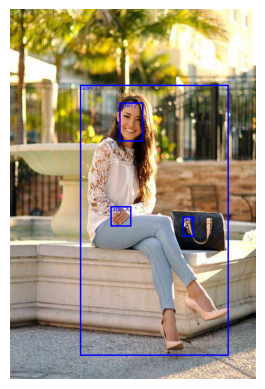

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị ảnh
plt.imshow(image)
plt.axis("off")  # Tắt trục
plt.show()

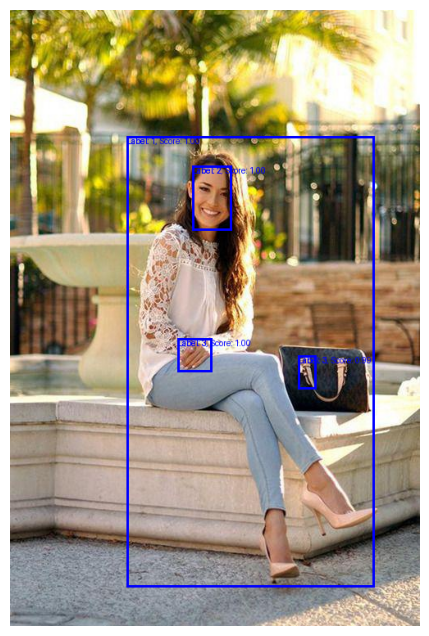

In [ ]:
visualize_labels(image, predictions)

In [ ]:
import tensorflow as tf
import torchvision.transforms as T
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Định nghĩa từ điển ánh xạ nhãn số thành tên cảm xúc
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

def process_single_image(image_path, detection_model, emotion_model, score_threshold=0.5):
    """
    Xử lý một ảnh duy nhất để trích xuất khuôn mặt và dự đoán cảm xúc.

    Args:
    - image_path (str): Đường dẫn tới ảnh.
    - detection_model (torch.nn.Module): Mô hình Faster R-CNN (PyTorch).
    - emotion_model (tensorflow.keras.Model): Mô hình cảm xúc (TensorFlow).
    - score_threshold (float): Ngưỡng tin cậy để lọc dự đoán.

    Returns:
    - dict: Kết quả gồm bounding boxes, khuôn mặt cắt được, và cảm xúc.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Mở ảnh
    image = Image.open(image_path).convert("RGB")

    # Tiền xử lý ảnh cho mô hình nhận diện
    detection_transform = T.Compose([T.ToTensor()])
    image_tensor = detection_transform(image).unsqueeze(0).to(device)

    # Dự đoán bounding boxes với Faster R-CNN
    detection_model.eval()
    with torch.no_grad():
        predictions = detection_model(image_tensor)[0]

    # Trích xuất khuôn mặt
    faces = []
    emotions = []
    emotion_transform = T.Compose([
        T.Resize((48, 48)),  # Thay đổi kích thước cho mô hình cảm xúc
        T.Grayscale(),       # Chuyển sang ảnh xám nếu cần
        T.ToTensor()
    ])

    for box, label, score in zip(predictions["boxes"], predictions["labels"], predictions["scores"]):
        if score >= score_threshold and label == 2:  # Label = 2 là "face"
            # Cắt khuôn mặt
            x_min, y_min, x_max, y_max = map(int, box.cpu().numpy())
            face = image.crop((x_min, y_min, x_max, y_max))
            faces.append(face)

            # Tiền xử lý khuôn mặt cho mô hình cảm xúc
            face_tensor = emotion_transform(face).unsqueeze(0).numpy()  # Chuyển thành NumPy array cho TensorFlow
            face_tensor = face_tensor.transpose(0, 2, 3, 1)  # Đổi thứ tự kênh thành [B, H, W, C]

            # Dự đoán cảm xúc
            emotion_prediction = emotion_model.predict(face_tensor, verbose=0)
            predicted_emotion = tf.argmax(emotion_prediction, axis=1).numpy()[0]

            # Áp dụng ánh xạ từ nhãn số sang tên cảm xúc
            emotion_name = emotion_labels[predicted_emotion]
            emotions.append(emotion_name)

    # Hiển thị từng khuôn mặt đã cắt và cảm xúc
    for i, face in enumerate(faces):
        plt.figure(figsize=(2, 2))
        plt.imshow(face)
        plt.title(f"Emotion: {emotions[i]}")
        plt.axis("off")
        plt.show()

    # Trả về kết quả
    return {
        "original_image": image,
        "faces": faces,
        "emotions": emotions,
        "bounding_boxes": [box.cpu().numpy() for box in predictions["boxes"]]
    }


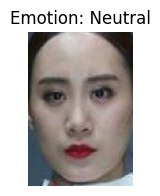

Predicted emotions: ['Neutral']
Emotion for face 1: Neutral


In [ ]:
# Xử lý ảnh
result = process_single_image(image_path, detection_model, emotion_model)

# In kết quả
print("Predicted emotions:", result["emotions"])
for i, face in enumerate(result["faces"]):
    print(f"Emotion for face {i + 1}: {result['emotions'][i]}")
    face.show()  # Hiển thị khuôn mặt